In [1]:
# install dependencies.  uncomment to install directly into your local environment

#! pip install numpy matplotlib pqdict

In [2]:
import numpy as np
import copy
import pickle as pickle
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.interpolate import griddata

In [2]:
# Run simulation for 1000 reactions.  See source code for other arguments.
# Output format is a list [T, Res, Cons, Args], where T is an array of times,
# Res is the time course of resource abundances, Cons is the time course of
# consumer abundances, Args is the array of input arguments.  The phenotype 
# space position of the consumers and resources are simply the indices of the
# respective arrays.

! python replicative.py

initializing...
created resource birth reactions...
created resource death reactions...
created consumer death reactions...
created consumer mutation reactions...
created consumption reactions...
created consumption+birth reactions...Done creating reactions!
created dependency graph!
Number of reactions executed:
Total time: 452.39104890823364


8.956868751858307


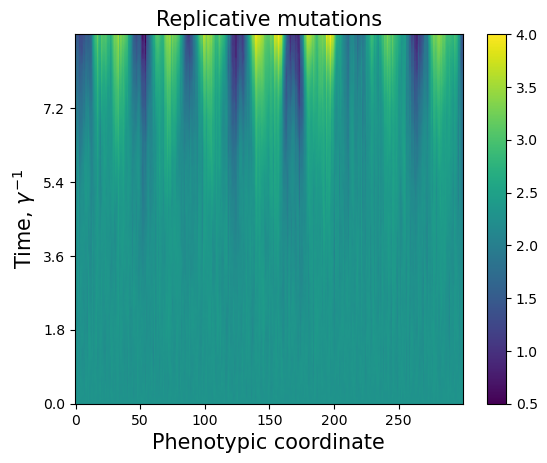

In [263]:
# example kymograph plot

# load data -- replace with appropriate output filename
with open('replicative.p', 'rb') as f:
    y = pickle.load(f)

num_gen = y[0][-1]*y[-1].gamma
print('Number of generations (units of consumer death rate): ', num_gen)

# interpolate uneven sampling times
kymo = []
for i in np.array(y[2]).T:
    kymo.append(griddata(y[0], i, np.arange(0, max(y[0]), max(y[0])/1000), method='nearest'))

# plot
plt.imshow(np.log10(np.array(kymo).T), aspect=1/3.5, origin='lower', vmin=0.5, vmax=4.0)
plt.colorbar()
plt.ylabel('Time, $\gamma^{-1}$', fontsize=15)
plt.xlabel('Phenotypic coordinate', fontsize=15)
plt.yticks([0, 200, 400, 600, 800], [round(i,2) for i in np.arange(0, num_gen, num_gen/5)])
plt.title('Replicative mutations', fontsize=15)
plt.savefig('stochastic_replicative_long.png', bbox_inches='tight', dpi=300)